## Part I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


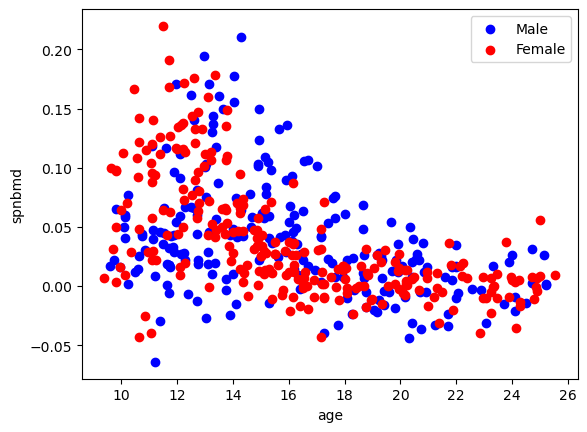

In [278]:
df = pd.read_csv("bone.csv")

male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

plt.scatter(male['age'], male['spnbmd'], color='b', label='Male')
plt.scatter(female['age'], female['spnbmd'], color='r', label='Female')
plt.legend()
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上图中蓝色点为男性数据，红色点为女性数据
- 从散点图中看出男女骨矿物质密度轨迹并无明显差异，同时对于男女而言年龄与骨矿物质密度间都呈现一定负相关关系

## Part II

# 第二部分题目表述有点问题
英文表意为在数据的33和67位百分位数处设置节点，此时每个区间内数据数量应是相同的  
中文表意为在年龄的33和67位百分位数处设置节点，此时是按年龄平均分为三个区间，不同区间内数据数量不同  
由于课程给出的参考文件 Non-Linear Regression.ipynb 中划分区间的方法更接近中文表意，此作业第二部分按照中文的表意进行作答  
第三部分题目表述无此问题

### (a)-阶梯函数

In [279]:
x_male = male['age']
x_female = female['age']
y_male = male['spnbmd']
y_female = female['spnbmd']

# 将x分为三个区间，在年龄的33和67百分位数进行截断
# right=True 意为每个区间包含右端点
df_cut_male, bins_male = pd.cut(x_male, 3, retbins=True, right=True)
df_cut_female, bins_female = pd.cut(x_female, 3, retbins=True, right=True)

print('Bins_male:', bins_male)
print('Bins_female:', bins_female)

Bins_male: [ 9.5844 14.8    20.     25.2   ]
Bins_female: [ 9.38385    14.78333333 20.16666667 25.55      ]


In [280]:
df_cut_male.value_counts(sort=False)

age
(9.584, 14.8]    96
(14.8, 20.0]     87
(20.0, 25.2]     43
Name: count, dtype: int64

In [281]:
df_cut_female.value_counts(sort=False)

age
(9.384, 14.783]     112
(14.783, 20.167]     97
(20.167, 25.55]      50
Name: count, dtype: int64

In [282]:
# 将x转换为虚拟变量
df_steps_dummies_male = pd.get_dummies(df_cut_male, dtype=float)
print(df_steps_dummies_male.head())

   (9.584, 14.8]  (14.8, 20.0]  (20.0, 25.2]
0            1.0           0.0           0.0
1            1.0           0.0           0.0
2            1.0           0.0           0.0
3            1.0           0.0           0.0
4            1.0           0.0           0.0


In [283]:
# 将x转换为虚拟变量
df_steps_dummies_female = pd.get_dummies(df_cut_female, dtype=float)
print(df_steps_dummies_female.head())

    (9.384, 14.783]  (14.783, 20.167]  (20.167, 25.55]
9               1.0               0.0              0.0
10              1.0               0.0              0.0
11              1.0               0.0              0.0
12              1.0               0.0              0.0
13              1.0               0.0              0.0


In [284]:
# 舍弃一列数据，防止完全共线性，将舍弃的一列数据作为基础水平
df_steps_dummies_male = df_steps_dummies_male.drop(df_steps_dummies_male.columns[0], axis=1)
df_steps_dummies_female = df_steps_dummies_female.drop(df_steps_dummies_female.columns[0], axis=1)

In [285]:
# 拟合阶梯函数
model_male = sm.OLS(y_male, sm.add_constant(df_steps_dummies_male)).fit()
model_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     20.48
Date:                Mon, 05 May 2025   Prob (F-statistic):           6.81e-09
Time:                        15:40:49   Log-Likelihood:                 381.68
No. Observations:                 226   AIC:                            -757.4
Df Residuals:                     223   BIC:                            -747.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0566      0.005     12.317      0.000       0.048       0.066
(14.8, 20.0]    -0.0179      0.007     -2.690      0.008      -0.031      -0.005
(20.0, 25.2]    -0.0528      0.008     -6.395      0.000      -0.069      -0.037
==============================================================================
Omnibus:                       22.815   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.077
Skew:                           0.751   Prob(JB):                     1.32e-06
Kurtosis:                       3.789   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
# 拟合阶梯函数
model_female = sm.OLS(y_female, sm.add_constant(df_steps_dummies_female)).fit()
model_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 05 May 2025   Prob (F-statistic):           5.90e-34
Time:                        15:40:49   Log-Likelihood:                 483.70
No. Observations:                 259   AIC:                            -961.4
Df Residuals:                     256   BIC:                            -950.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0773      0.004     21.757      0.000       0.070       0.084
(14.783, 20.167]    -0.0633      0.005    -12.128      0.000      -0.074      -0.053
(20.167, 25.55]     -0.0761      0.006    -11.898      0.000      -0.089      -0.064
==============================================================================
Omnibus:                       13.248   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.019
Skew:                           0.243   Prob(JB):                     3.69e-06
Kurtosis:                       4.443   Cond. No.                         3.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

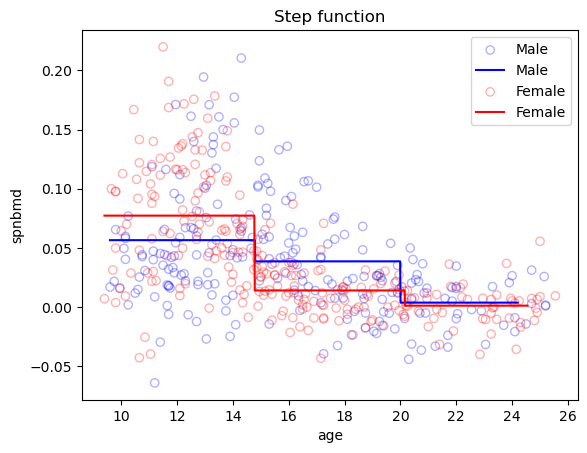

In [287]:
# 预测男性骨矿物质密度
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
bin_mapping_male = np.digitize(x_space_male, bins_male) # 将生成的1000个x值分配到对应区间中
x_space_dummy_male = pd.get_dummies(bin_mapping_male, dtype=float)
x_space_dummy_male = x_space_dummy_male.drop(x_space_dummy_male.columns[0], axis=1)

pred_male = model_male.predict(sm.add_constant(x_space_dummy_male))

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
bin_mapping_female = np.digitize(x_space_female, bins_female)
x_space_dummy_female = pd.get_dummies(bin_mapping_female, dtype=float)
x_space_dummy_female = x_space_dummy_female.drop(x_space_dummy_female.columns[0], axis=1)

pred_female = model_female.predict(sm.add_constant(x_space_dummy_female))

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Step function')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上述模型自由度为3
  - 由于将x分为了三个区间，且为了避免完全共线性问题，删除了一个区间，自由度为2，但同时添加了常数项，所以模型自由度还是3，相当于将删除的区间作为基准水平

### (b)-连续分段二次回归

In [288]:
import pwlf

In [289]:
knots_male = np.array([x_male.min(), 14.8, 20.0, x_male.max()])
model_male = pwlf.PiecewiseLinFit(x_male, y_male, degree=2) # 限定为二次回归
model_male.fit_with_breaks(knots_male)

np.float64(0.374914886705473)

In [290]:
knots_female = np.array([x_female.min(), 14.783, 20.167, x_female.max()])
model_female = pwlf.PiecewiseLinFit(x_female, y_female, degree=2)
model_female.fit_with_breaks(knots_female)

np.float64(0.3089653366239099)

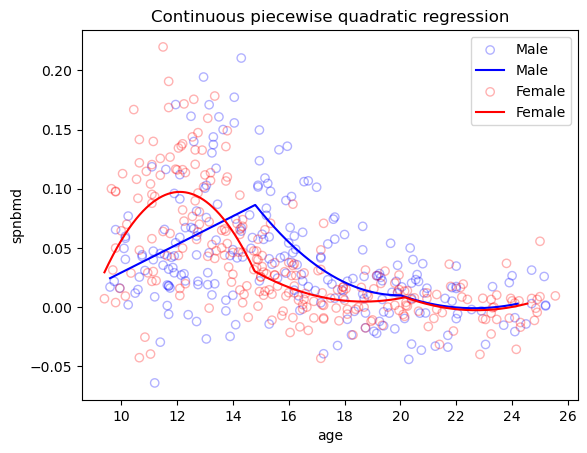

In [291]:
# 预测男性骨矿物质密度
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
pred_male = model_male.predict(x_space_male)

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
pred_female = model_female.predict(x_space_female)

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Continuous piecewise quadratic regression')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上述连续分段二次回归模型的自由度为7
    - 对于分段二次回归模型而言，每段中自由度为3，分为三段，总自由度为9，由于在分段处给模型添加了“连续”约束，所以连续分段二次回归模型自由度为9-2=7

### (c)-连续分段三次回归

In [292]:
import pwlf

In [293]:
knots_male = np.array([x_male.min(), 14.8, 20.0, x_male.max()])
model_male = pwlf.PiecewiseLinFit(x_male, y_male, degree=3) # 限定为三次回归
model_male.fit_with_breaks(knots_male)

np.float64(0.37219115662917346)

In [294]:
knots_female = np.array([x_female.min(), 14.783, 20.167, x_female.max()])
model_female = pwlf.PiecewiseLinFit(x_female, y_female, degree=3)
model_female.fit_with_breaks(knots_female)

np.float64(0.30824873488603927)

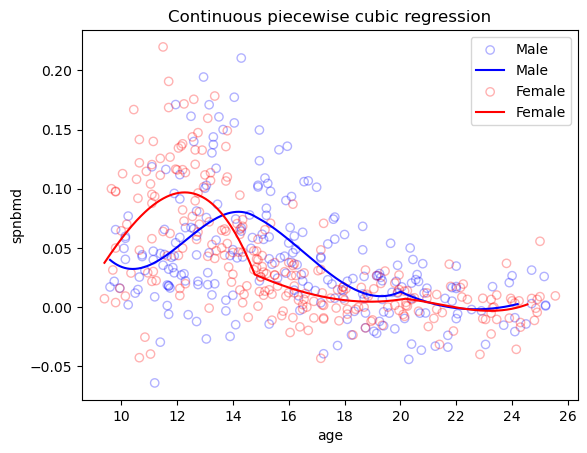

In [295]:
# 预测男性骨矿物质密度
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
pred_male = model_male.predict(x_space_male)

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
pred_female = model_female.predict(x_space_female)

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Continuous piecewise cubic regression')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上述连续分段三次回归模型的自由度为10
    - 对于分段二次回归模型而言，每段中自由度为4，分为三段，总自由度为12，由于在分段处给模型添加了“连续”约束，所以连续分段二次回归模型自由度为12-2=10

### (d)-三次样条

In [296]:
from patsy import dmatrix # dmatrix means design matrix. We convert data to the designed basis fucntions in a matrix

In [297]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# bs means b-spline
transformed_x_male = dmatrix("bs(x, knots=(14.8, 20.0), degree=3)", {"x": x_male}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_male = sm.OLS(y_male, transformed_x_male).fit()

model_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     17.93
Date:                Mon, 05 May 2025   Prob (F-statistic):           6.65e-15
Time:                        15:40:50   Log-Likelihood:                 401.25
No. Observations:                 226   AIC:                            -790.5
Df Residuals:                     220   BIC:                            -770.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0256      0.017      1.529      0.128      -0.007       0.059
bs(x, knots=(14.8, 20.0), degree=3)[0]     0.0144      0.029      0.503      0.616      -0.042       0.071
bs(x, knots=(14.8, 20.0), degree=3)[1]     0.0923      0.019      4.781      0.000       0.054       0.130
bs(x, knots=(14.8, 20.0), degree=3)[2]    -0.0675      0.028     -2.395      0.017      -0.123      -0.012
bs(x, knots=(14.8, 20.0), degree=3)[3]    -0.0022      0.027     -0.083      0.934      -0.055       0.050
bs(x, knots=(14.8, 20.0), degree=3)[4]    -0.0246      0.026     -0.931      0.353      -0.077       0.027
==============================================================================
Omnibus:                       13.464   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.408
Skew:                           0.494   Prob(JB):                     0.000451
Kurtosis:                       3.811   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# bs means b-spline
transformed_x_female = dmatrix("bs(x, knots=(14.783, 20.167), degree=3)", {"x": x_female}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_female = sm.OLS(y_female, transformed_x_female).fit()

model_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     54.66
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.35e-38
Time:                        15:40:50   Log-Likelihood:                 501.15
No. Observations:                 259   AIC:                            -990.3
Df Residuals:                     253   BIC:                            -969.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.0135      0.013      1.008      0.314      -0.013       0.040
bs(x, knots=(14.783, 20.167), degree=3)[0]     0.1504      0.023      6.404      0.000       0.104       0.197
bs(x, knots=(14.783, 20.167), degree=3)[1]    -0.0210      0.015     -1.411      0.159      -0.050       0.008
bs(x, knots=(14.783, 20.167), degree=3)[2]    -0.0003      0.023     -0.013      0.989      -0.046       0.045
bs(x, knots=(14.783, 20.167), degree=3)[3]    -0.0242      0.021     -1.163      0.246      -0.065       0.017
bs(x, knots=(14.783, 20.167), degree=3)[4]    -0.0016      0.024     -0.067      0.947      -0.049       0.046
==============================================================================
Omnibus:                       16.882   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.312
Skew:                          -0.084   Prob(JB):                     1.96e-11
Kurtosis:                       5.131   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

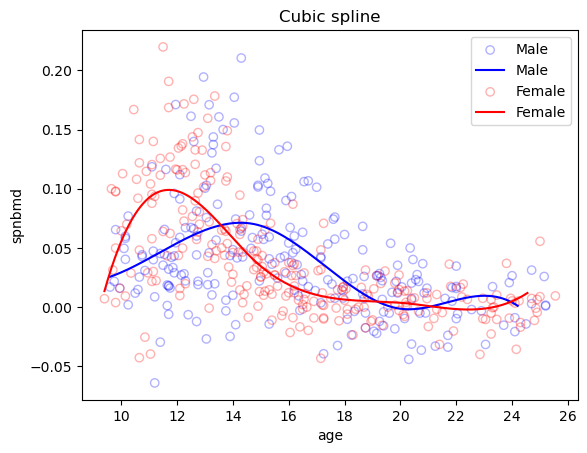

In [299]:
# 预测男性骨矿物质密度
# 在做预测时也要对x进行变换，因为使用了基函数，在训练模型时使用的是经过基函数变换的x，模型反映变换后x与y间关系，所以在预测时也要对用于预测的区间上的x进行变换
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
pred_male = model_male.predict(dmatrix("bs(x, knots=(14.8, 20.0),degree =3)", {"x": x_space_male}, return_type='dataframe'))

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
pred_female = model_female.predict(dmatrix("bs(x, knots=(14.783, 20.167),degree =3)", {"x": x_space_female}, return_type='dataframe'))

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Cubic spline')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上述三次样条模型的自由度为6
    - 对于第一个分段，模型自由度为4，对于后两个分段，模型添加了新的三次项，添加了2个自由度，所以模型总自由度为6

### (e)-三次自然样条

In [300]:
from patsy import dmatrix # dmatrix means design matrix. We convert data to the designed basis fucntions in a matrix

In [301]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# cr is natural cubic spline 
# 因为 cr 已经限制了为三次自然样条，在对自变量进行变换时不需添加 degree=3 的限制
transformed_x_male = dmatrix("cr(x, knots=(14.8, 20.0))", {"x": x_male}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_male = sm.OLS(y_male, transformed_x_male).fit()

model_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     29.64
Date:                Mon, 05 May 2025   Prob (F-statistic):           3.72e-16
Time:                        15:40:50   Log-Likelihood:                 400.69
No. Observations:                 226   AIC:                            -793.4
Df Residuals:                     222   BIC:                            -779.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0214      0.003      6.568      0.000       0.015       0.028
cr(x, knots=(14.8, 20.0))[0]    -0.0014      0.009     -0.152      0.879      -0.019       0.016
cr(x, knots=(14.8, 20.0))[1]     0.0482      0.005      8.837      0.000       0.037       0.059
cr(x, knots=(14.8, 20.0))[2]    -0.0185      0.006     -3.320      0.001      -0.029      -0.008
cr(x, knots=(14.8, 20.0))[3]    -0.0070      0.012     -0.606      0.545      -0.030       0.016
==============================================================================
Omnibus:                       13.475   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           0.496   Prob(JB):                     0.000454
Kurtosis:                       3.807   Cond. No.                     9.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [302]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# cr is natural cubic spline 
transformed_x_female = dmatrix("cr(x, knots=(14.783, 20.167))", {"x": x_female}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_female = sm.OLS(y_female, transformed_x_female).fit()

model_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     62.31
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.97e-30
Time:                        15:40:50   Log-Likelihood:                 477.51
No. Observations:                 259   AIC:                            -947.0
Df Residuals:                     255   BIC:                            -932.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0302      0.003     11.381      0.000       0.025       0.035
cr(x, knots=(14.783, 20.167))[0]     0.0615      0.007      8.221      0.000       0.047       0.076
cr(x, knots=(14.783, 20.167))[1]     0.0192      0.005      4.266      0.000       0.010       0.028
cr(x, knots=(14.783, 20.167))[2]    -0.0383      0.005     -7.251      0.000      -0.049      -0.028
cr(x, knots=(14.783, 20.167))[3]    -0.0122      0.010     -1.277      0.203      -0.031       0.007
==============================================================================
Omnibus:                       15.374   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.373
Skew:                           0.299   Prob(JB):                     4.19e-07
Kurtosis:                       4.538   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

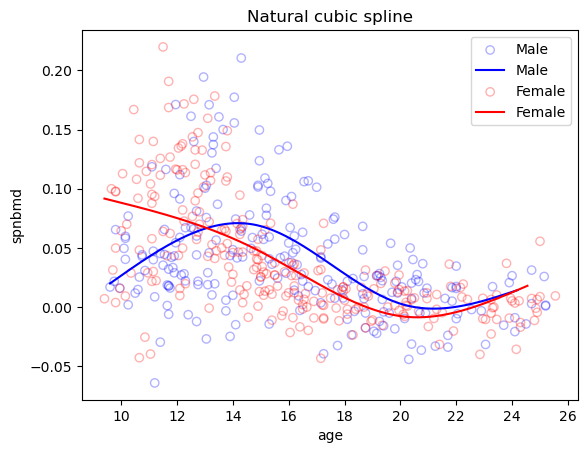

In [303]:
# 预测男性骨矿物质密度
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
pred_male = model_male.predict(dmatrix("cr(x, knots=(14.8, 20.0))", {"x": x_space_male}, return_type='dataframe'))

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
pred_female = model_female.predict(dmatrix("cr(x, knots=(14.783, 20.167))", {"x": x_space_female}, return_type='dataframe'))

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Natural cubic spline')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

- 上述三次自然样条模型的自由度为4
    - 对于(d)中的三次样条模型，其自由度为6，三次自然样条在其基础上对两端添加了线性约束，即二阶导为零，所以三次自然样条模型自由度为6-2=4

## Part III

### (1)

第二部分中的三次自然样条模型最合适
- 阶梯函数认为同一区间内的响应变量为常数，显然只能一定程度上反映不同区间差异，无法反映同一区间内响应变量变化趋势
- 连续分段二次回归和三次回归并未保证拟合曲线在节点处是光滑的，即未保证节点处导数连续，这意为着节点两侧临近点处响应变量变化趋势有明显不同，即节点选择会影响拟合结果，由于节点选择一定程度上是主观的，所以这种拟合方法存在一定问题。同时由于对每个区间都添加了多个自变量，模型自由度可能过高，导致过拟合问题
- 三次样条较好地解决了连续分段回归的拟合图像在节点处不光滑的问题，但其拟合函数在两端方差较大，这是由于两端数据较少，同时两端数据收到的控制较少，所以在两端需要通过限制模型自由度来降低方差，提高泛化能力
- 三次自然样条通过限定节点处导函数连续保证拟合函数在节点处光滑，同时在两端使用线性约束降低模型自由度，提高泛化能力，所以三次自然样条模型最合适

### (2)

In [304]:
from sklearn.model_selection import KFold

In [305]:
# 这里不区分男女，用在整个数据集上的预测效果来筛选最优节点数
x = df['age']
y = df['spnbmd']

In [306]:
# 用于存储不同节点数对应的平均MSE
mse_scores = {}

# 进行100次循环以保证输出的稳定性
for flag in range(100):
    # 尝试2到7个节点
    for num_knots in range(2, 8):
        # 根据百分位数确定节点位置
        # np.linspace(0, 100, num_knots + 1) 生成包含 num_knots+1 个元素的一维数组，元素从0到100均匀分布
        # [1:-1] 对上述生成数组进行切片，去除第一个和最后一个元素（这两个元素对应数据集两端点，不用设置节点）
        # .percentile() 方法对x进行处理，选取对应分位数上的自变量值
        knots = np.percentile(x, np.linspace(0, 100, num_knots + 2)[1:-1])
        # 初始化5折交叉验证
        kf = KFold(n_splits=5, shuffle=True)
        fold_mse = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # 对自变量进行基函数变换
            transformed_x_train = dmatrix("cr(x, knots=knots)", {"x": x_train}, return_type='dataframe')
            transformed_x_test = dmatrix("cr(x, knots=knots)", {"x": x_test}, return_type='dataframe')
            # 创建并训练三次自然样条模型
            model = sm.OLS(y_train, transformed_x_train).fit()
            # 预测测试集
            pred = model.predict(transformed_x_test)
            # 计算均方误差
            mse = np.mean((pred - y_test) ** 2)
            fold_mse.append(mse)
        # 计算此次循环的平均MSE并添加到字典中
        fold_mse_mean = np.mean(fold_mse)

        if flag > 0:
            mse_scores[num_knots].append(fold_mse_mean)
        else:
            mse_scores[num_knots] = [fold_mse_mean]

# 取100次循环所得MSE的均值
for num_knots, mse_list in mse_scores.items():
    mse_scores[num_knots] = np.mean(mse_list)

# 输出每种节点数的平均MSE
for num_knots, mse in mse_scores.items():
    print(f"{num_knots}个节点的MSE为: {mse}")

# 找出最小的平均MSE对应的节点数
best_num_knots = min(mse_scores, key=mse_scores.get)
print(f"最佳节点数: {best_num_knots}")

2个节点的MSE为: 0.0016892989796842147
3个节点的MSE为: 0.0016706875713534755
4个节点的MSE为: 0.0016792113416358554
5个节点的MSE为: 0.0016824232602622806
6个节点的MSE为: 0.0016762935178161967
7个节点的MSE为: 0.0016832516910822593
最佳节点数: 3


- 从五折交叉验证结果看来最佳节点数为3
    - 在筛选最佳节点数时并未用男女性数据分别训练模型，因为不确定此时获取的两个MSE用何种方式取平均(算数平均、几何平均......)，所以直接在整个数据集上选取训练集并训练一个模型，用所得MSE作为评价标准
    - 在写作业过程中发现单纯用五折交叉验证来选取节点数量的话每次运行代码所得结果可能不同，这是训练集与测试集选取的随机性导致的，所以代码中进行了100次循环，即对每种节点数进行了100次5折交叉验证，取100次的平均MSE作为评价标准，此时输出结果稳定为3

### (3)

In [307]:
# 确定节点数
num_knots = 3

# 选取节点
knots_male = np.percentile(x_male, np.linspace(0, 100, num_knots + 2)[1:-1])
knots_female = np.percentile(x_female, np.linspace(0, 100, num_knots + 2)[1:-1])

In [308]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# cr is natural cubic spline 
# 因为 cr 已经限制了为三次自然样条，在对自变量进行变换时不需添加 degree=3 的限制
transformed_x_male = dmatrix("cr(x, knots=knots_male)", {"x": x_male}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_male = sm.OLS(y_male, transformed_x_male).fit()

model_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     22.28
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.81e-15
Time:                        15:41:08   Log-Likelihood:                 400.91
No. Observations:                 226   AIC:                            -791.8
Df Residuals:                     221   BIC:                            -774.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0277      0.003      8.190      0.000       0.021       0.034
cr(x, knots=knots_male)[0]    -0.0119      0.011     -1.049      0.295      -0.034       0.010
cr(x, knots=knots_male)[1]     0.0376      0.006      5.866      0.000       0.025       0.050
cr(x, knots=knots_male)[2]     0.0349      0.005      6.797      0.000       0.025       0.045
cr(x, knots=knots_male)[3]    -0.0171      0.006     -2.702      0.007      -0.029      -0.005
cr(x, knots=knots_male)[4]    -0.0158      0.012     -1.330      0.185      -0.039       0.008
==============================================================================
Omnibus:                       12.390   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.960
Skew:                           0.470   Prob(JB):                     0.000930
Kurtosis:                       3.775   Cond. No.                     6.85e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [309]:
# Generating cubic spline with 3 knots at 25, 40 and 60
# cr is natural cubic spline 
transformed_x_female = dmatrix("cr(x, knots=knots_female)", {"x": x_female}, return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
model_female = sm.OLS(y_female, transformed_x_female).fit()

model_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     70.84
Date:                Mon, 05 May 2025   Prob (F-statistic):           3.19e-40
Time:                        15:41:08   Log-Likelihood:                 503.33
No. Observations:                 259   AIC:                            -996.7
Df Residuals:                     254   BIC:                            -978.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0268      0.003     10.688      0.000       0.022       0.032
cr(x, knots=knots_female)[0]     0.0135      0.009      1.530      0.127      -0.004       0.031
cr(x, knots=knots_female)[1]     0.0670      0.005     12.987      0.000       0.057       0.077
cr(x, knots=knots_female)[2]    -0.0012      0.004     -0.328      0.743      -0.009       0.006
cr(x, knots=knots_female)[3]    -0.0221      0.005     -4.195      0.000      -0.032      -0.012
cr(x, knots=knots_female)[4]    -0.0304      0.009     -3.455      0.001      -0.048      -0.013
==============================================================================
Omnibus:                       14.006   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               35.859
Skew:                           0.039   Prob(JB):                     1.63e-08
Kurtosis:                       4.821   Cond. No.                     9.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

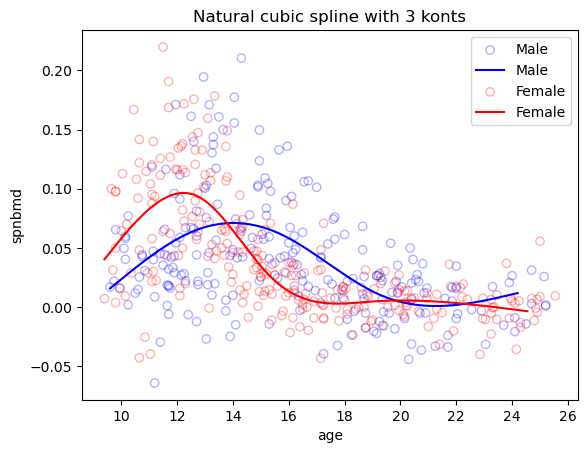

In [ ]:
# 预测男性骨矿物质密度
x_space_male = np.linspace(x_male.min(), x_male.max()-1, 1000)
pred_male = model_male.predict(dmatrix("cr(x, knots=knots_male)", {"x": x_space_male}, return_type='dataframe'))

# 预测女性骨矿物质密度
x_space_female = np.linspace(x_female.min(), x_female.max()-1, 1000)
pred_female = model_female.predict(dmatrix("cr(x, knots=knots_female)", {"x": x_space_female}, return_type='dataframe'))

# 作图
plt.scatter(x_male, y_male, facecolor='None', edgecolors='b', alpha=0.3, label='Male')
plt.plot(x_space_male, pred_male, 'b-', label='Male')

plt.scatter(x_female, y_female, facecolor='None', edgecolors='r', alpha=0.3, label='Female')
plt.plot(x_space_female, pred_female, 'r-', label='Female')

plt.legend() # 显示图例
plt.title('Natural cubic spline with 3 knots')
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.show()

选择3个节点并使用自然样条模型作图如上所示  
- 对于男性，随着年龄增大，骨矿物质密度先上升后下降再上升
  - 先上升是由于进入青春期，身体发育到达顶点
  - 后下降是由于青春期结束，由于激素水平等的影响，骨矿物质密度逐渐下降
    - 坏了，我已经20岁了，我的青春结束了:(
    - 学校还我青春！！！！！
  - 倾向于认为再上升是由于数据集本身的问题，数据集的这种倾向可能不代表总体倾向，不过也有可能是男性自身在22岁后由于激素水平等的影响骨矿物质密度还会上升
    - 希望是真的
- 对于女性，随着年龄增大，骨矿物质密度先上升后下降，在18到24岁又会再次上升、下降
  - 总体趋势和男性差不多
  - 注意到女性相比男性骨矿物质密度达到峰值的年龄更小，这是因为女性相比男性发育更早
  - 女性骨矿物质密度的峰值比男性高
    - 也许是完成生育过程需要更高的骨矿物质密度？
    - 明明女性峰值更高，但老年时女性骨质疏松问题却更严重，这一现象值得思考，可能是基因、生育、生活习惯的影响
      - 唉，不是天龙人还是不要生育得好（暴论）
  - 在18到24岁时女性骨矿物质密度又会再次上升、下降，这可能反映了骨矿物质密度变化的某种周期特征，对于男性可能也有这种特征，也许增加数据集中年龄范围后也会反映出这种特征